# DCGAN
Paper: https://arxiv.org/pdf/1511.06434.pdf

In [1]:
!pip install array2gif

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam
import torchvision
import numpy as np

class Generator(nn.Module):
  def __init__(self, latent_size = 100):
    super(Generator, self).__init__()

    self.layers = nn.Sequential(nn.ConvTranspose2d(latent_size, 1024, 4,1,0,bias=False),
                           nn.BatchNorm2d(1024),
                           nn.ReLU(True),
                           # 4x4
                           nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(512),
                           nn.ReLU(True),
                           # 8x8
                           nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(256),
                           nn.ReLU(True),
                           # 16 x 16
                           nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(128),
                           nn.ReLU(True),
                           # 32 x 32
                           nn.ConvTranspose2d(128, 1, 4, 2, 1, bias=False),
                           nn.Tanh()
                           # 64 x 64
                           )
  def __call__(self, latent_space):
      return self.forward(latent_space)
    
  def forward(self, latent_space):
      return self.layers(latent_space.cuda())
       


class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    # 64x64
    self.layers = nn.Sequential(nn.Conv2d(1, 128, 4,2,1,bias=False),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 32x32
                           nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(256),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 16 x 16
                           nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(512),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 8 x 8
                           nn.Conv2d(512, 1024, 4, 2, 1, bias=False),
                           nn.BatchNorm2d(1024),
                           nn.LeakyReLU(0.2, inplace=True),
                           # 4 x 4
                           nn.Conv2d(1024, 1, 4, 1, 0, bias=False),
                           nn.Sigmoid()
                           # 1 x 1
                          )
  def __call__(self, img):
      return self.forward(img)
    
  def forward(self, img):
      return self.layers(img.cuda())


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def plot_epoch(images, n=36):
    '''  
    Visualize a single epoch of images
    Parameters
    ----------
    images : numpy.ndarray
             images of shape (b, c, x, y)
    n      : int, default: 36
             number of images to display. Must be a square number
    ''' 

    if not isinstance(images, np.ndarray):
        images = images.detach().numpy()

    rowcols = np.sqrt(n) 
    plt.figure(figsize=(rowcols, rowcols))
    for index in range(n):
        plt.subplot(rowcols, rowcols, index + 1)
        plt.imshow(images[index, 0, :, :], cmap="binary")
        plt.axis("off")
    plt.show()

Device is: cuda
Epoch [0/10], Step [80/468], d_loss: 0.0088, g_loss: 8.9350, D(x): 1.00, D(G(z)): 0.00


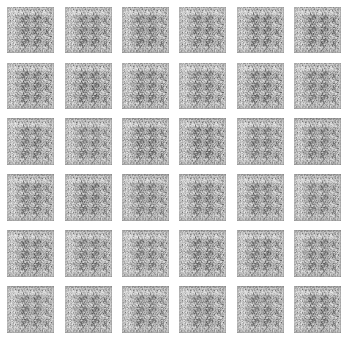

Epoch [0/10], Step [160/468], d_loss: 0.0051, g_loss: 8.6780, D(x): 1.00, D(G(z)): 0.00


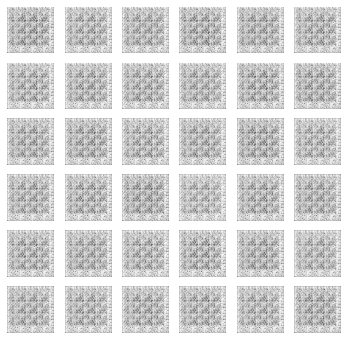

Epoch [0/10], Step [240/468], d_loss: 0.0117, g_loss: 9.1389, D(x): 0.99, D(G(z)): 0.00


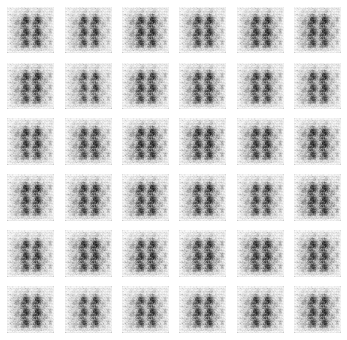

Epoch [0/10], Step [320/468], d_loss: 0.0055, g_loss: 7.4610, D(x): 1.00, D(G(z)): 0.00


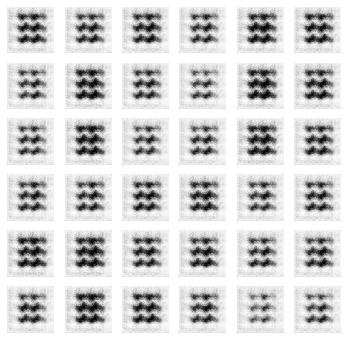

Epoch [0/10], Step [400/468], d_loss: 0.1624, g_loss: 23.9170, D(x): 0.96, D(G(z)): 0.00


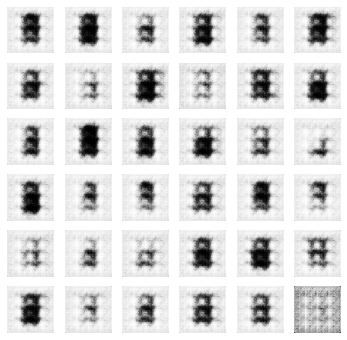

Epoch [1/10], Step [80/468], d_loss: 0.0154, g_loss: 7.2293, D(x): 0.99, D(G(z)): 0.01


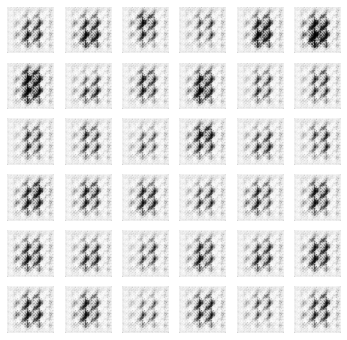

Epoch [1/10], Step [160/468], d_loss: 0.0095, g_loss: 7.0833, D(x): 1.00, D(G(z)): 0.00


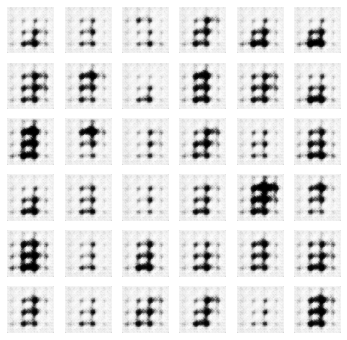

Epoch [1/10], Step [240/468], d_loss: 0.0121, g_loss: 6.9451, D(x): 1.00, D(G(z)): 0.01


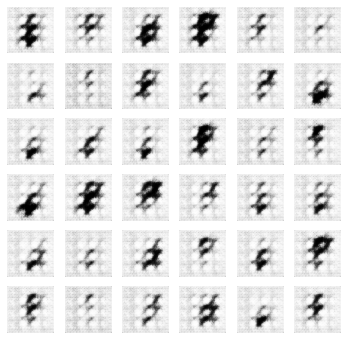

Epoch [1/10], Step [320/468], d_loss: 0.0090, g_loss: 7.4209, D(x): 0.99, D(G(z)): 0.00


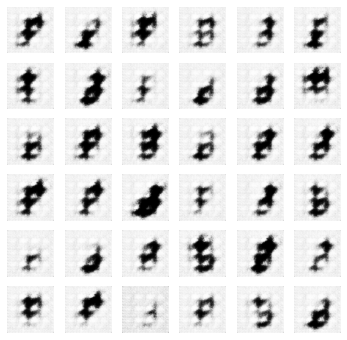

Epoch [1/10], Step [400/468], d_loss: 0.0199, g_loss: 6.4675, D(x): 1.00, D(G(z)): 0.02


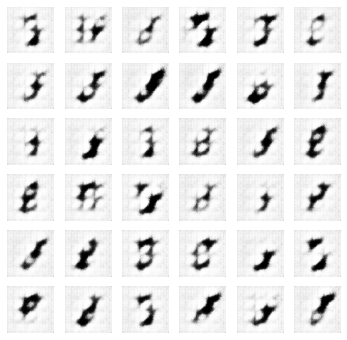

Epoch [2/10], Step [80/468], d_loss: 0.0311, g_loss: 5.5963, D(x): 1.00, D(G(z)): 0.03


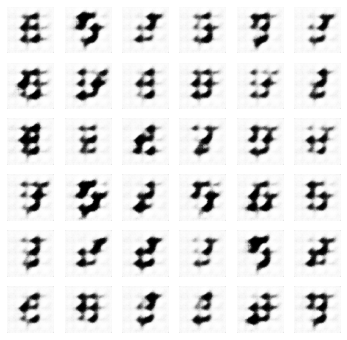

Epoch [2/10], Step [160/468], d_loss: 0.2635, g_loss: 25.0005, D(x): 0.82, D(G(z)): 0.00


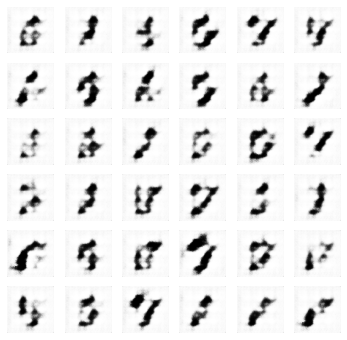

Epoch [2/10], Step [240/468], d_loss: 0.0217, g_loss: 7.2603, D(x): 0.99, D(G(z)): 0.01


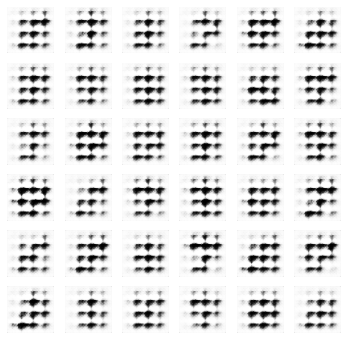

Epoch [2/10], Step [320/468], d_loss: 0.0268, g_loss: 7.8679, D(x): 0.99, D(G(z)): 0.01


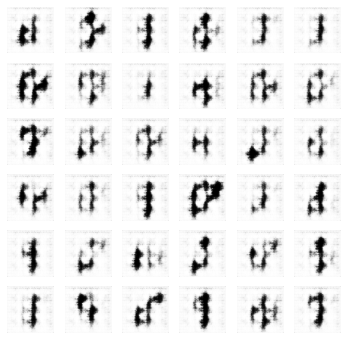

Epoch [2/10], Step [400/468], d_loss: 0.0020, g_loss: 7.5748, D(x): 1.00, D(G(z)): 0.00


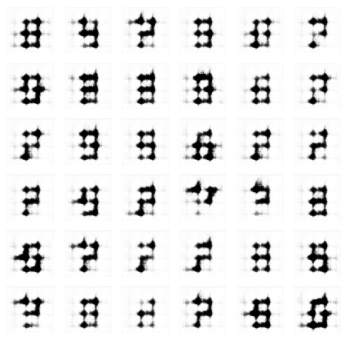

Epoch [3/10], Step [80/468], d_loss: 0.0096, g_loss: 5.7465, D(x): 0.99, D(G(z)): 0.00


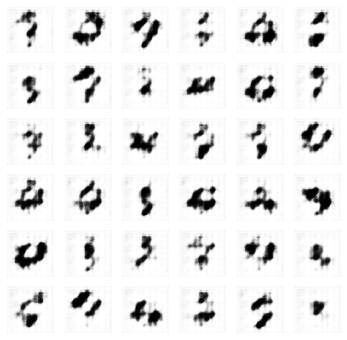

Epoch [3/10], Step [160/468], d_loss: 0.0280, g_loss: 6.4801, D(x): 0.99, D(G(z)): 0.02


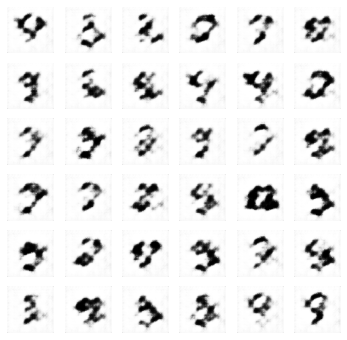

Epoch [3/10], Step [240/468], d_loss: 0.0245, g_loss: 9.7454, D(x): 0.98, D(G(z)): 0.00


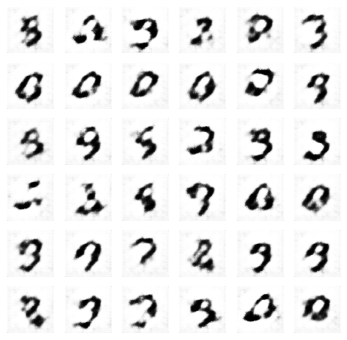

Epoch [3/10], Step [320/468], d_loss: 0.1199, g_loss: 7.3474, D(x): 0.91, D(G(z)): 0.00


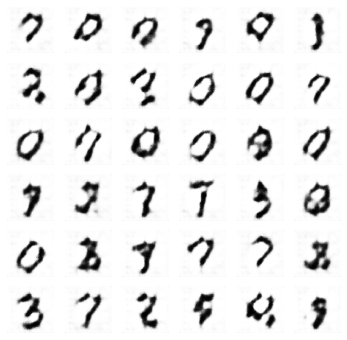

Epoch [3/10], Step [400/468], d_loss: 0.0182, g_loss: 5.6768, D(x): 0.99, D(G(z)): 0.01


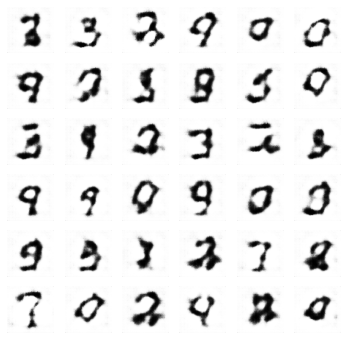

Epoch [4/10], Step [80/468], d_loss: 0.0410, g_loss: 7.9405, D(x): 0.98, D(G(z)): 0.00


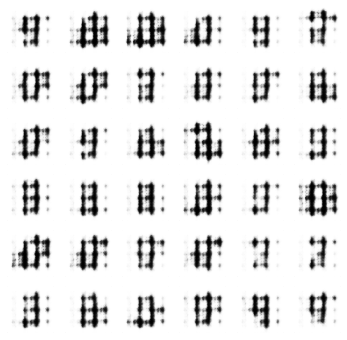

Epoch [4/10], Step [160/468], d_loss: 0.0069, g_loss: 7.6474, D(x): 1.00, D(G(z)): 0.00


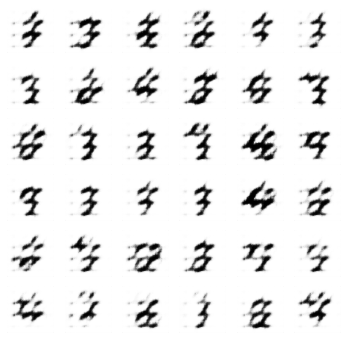

Epoch [4/10], Step [240/468], d_loss: 0.0252, g_loss: 7.5263, D(x): 0.99, D(G(z)): 0.01


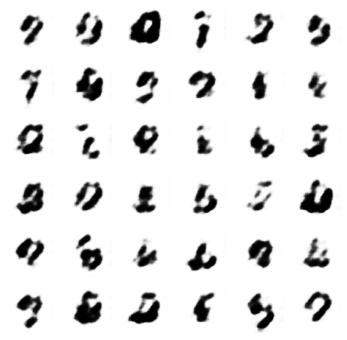

Epoch [4/10], Step [320/468], d_loss: 0.0113, g_loss: 8.7739, D(x): 0.99, D(G(z)): 0.00


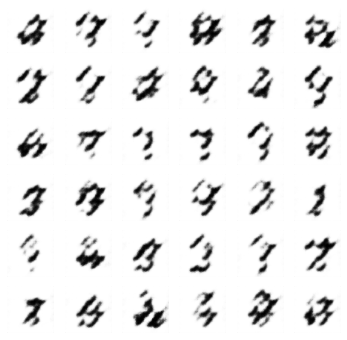

Epoch [4/10], Step [400/468], d_loss: 0.0421, g_loss: 5.3483, D(x): 0.97, D(G(z)): 0.01


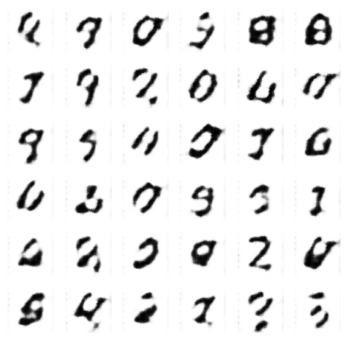

Epoch [5/10], Step [80/468], d_loss: 0.0764, g_loss: 6.5487, D(x): 0.98, D(G(z)): 0.05


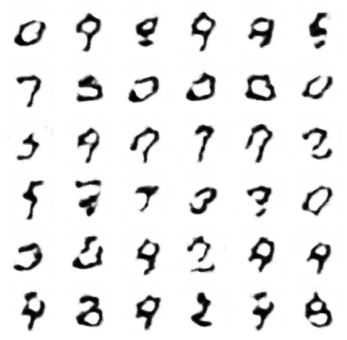

Epoch [5/10], Step [160/468], d_loss: 0.1711, g_loss: 4.4887, D(x): 0.90, D(G(z)): 0.01


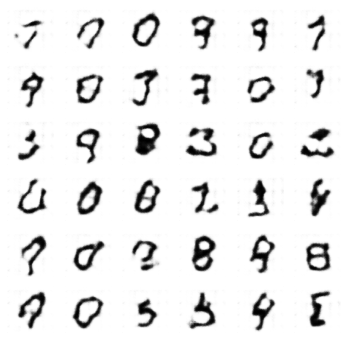

Epoch [5/10], Step [240/468], d_loss: 0.0371, g_loss: 6.2961, D(x): 0.98, D(G(z)): 0.02


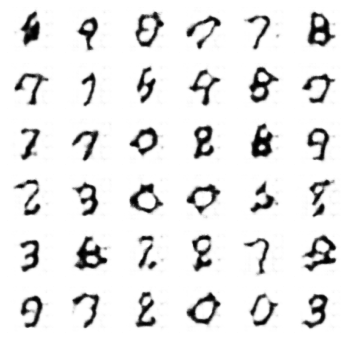

Epoch [5/10], Step [320/468], d_loss: 0.0425, g_loss: 4.3411, D(x): 1.00, D(G(z)): 0.03


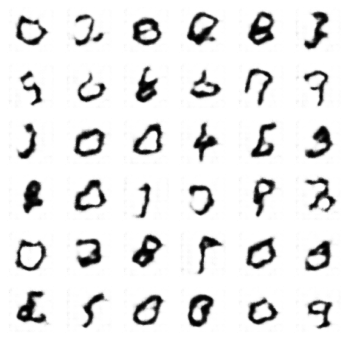

Epoch [5/10], Step [400/468], d_loss: 0.2980, g_loss: 6.7155, D(x): 0.94, D(G(z)): 0.12


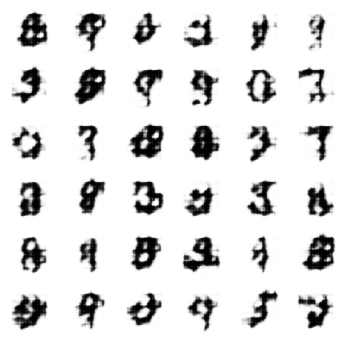

Epoch [6/10], Step [80/468], d_loss: 0.0216, g_loss: 6.7488, D(x): 0.99, D(G(z)): 0.01


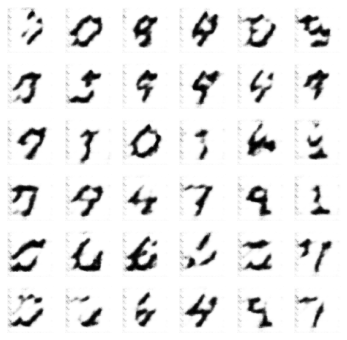

Epoch [6/10], Step [160/468], d_loss: 0.0443, g_loss: 3.9412, D(x): 0.99, D(G(z)): 0.03


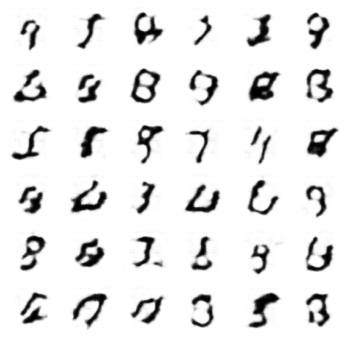

Epoch [6/10], Step [240/468], d_loss: 0.0527, g_loss: 6.5116, D(x): 0.97, D(G(z)): 0.01


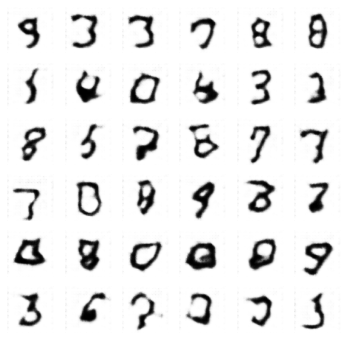

Epoch [6/10], Step [320/468], d_loss: 0.0422, g_loss: 4.3604, D(x): 0.98, D(G(z)): 0.02


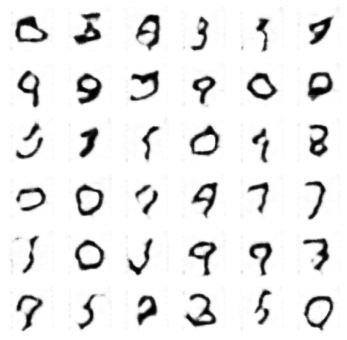

Epoch [6/10], Step [400/468], d_loss: 0.0966, g_loss: 2.4853, D(x): 1.00, D(G(z)): 0.08


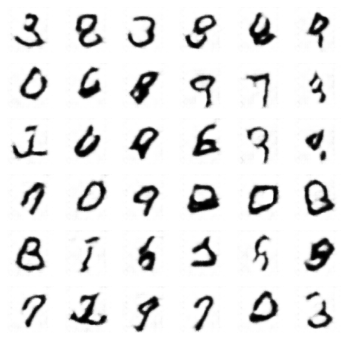

Epoch [7/10], Step [80/468], d_loss: 0.0643, g_loss: 4.9570, D(x): 0.97, D(G(z)): 0.03


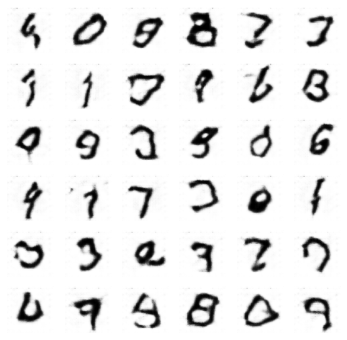

Epoch [7/10], Step [160/468], d_loss: 0.0830, g_loss: 4.1210, D(x): 0.99, D(G(z)): 0.06


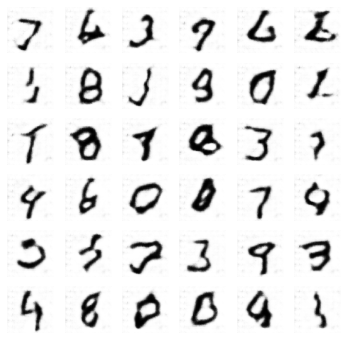

Epoch [7/10], Step [240/468], d_loss: 0.0386, g_loss: 4.9902, D(x): 0.98, D(G(z)): 0.02


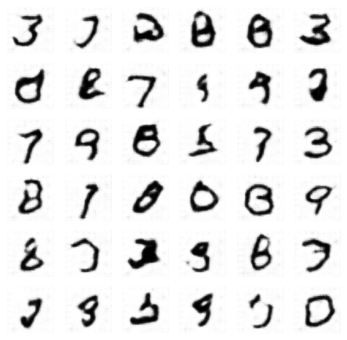

Epoch [7/10], Step [320/468], d_loss: 0.1189, g_loss: 4.1165, D(x): 0.99, D(G(z)): 0.10


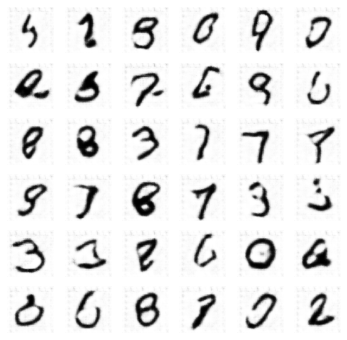

Epoch [7/10], Step [400/468], d_loss: 0.1364, g_loss: 4.6440, D(x): 0.97, D(G(z)): 0.08


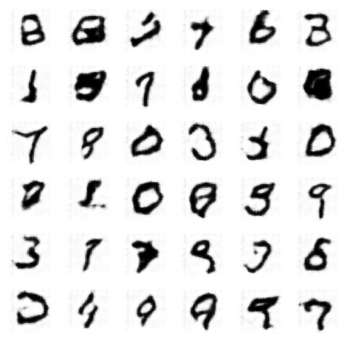

Epoch [8/10], Step [80/468], d_loss: 0.0470, g_loss: 4.8035, D(x): 0.97, D(G(z)): 0.01


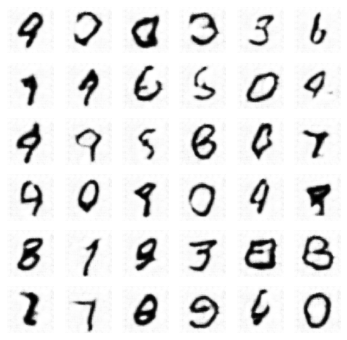

Epoch [8/10], Step [160/468], d_loss: 0.0849, g_loss: 3.7298, D(x): 0.96, D(G(z)): 0.04


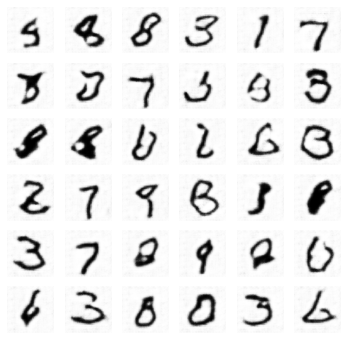

Epoch [8/10], Step [240/468], d_loss: 0.0671, g_loss: 5.9803, D(x): 0.95, D(G(z)): 0.01


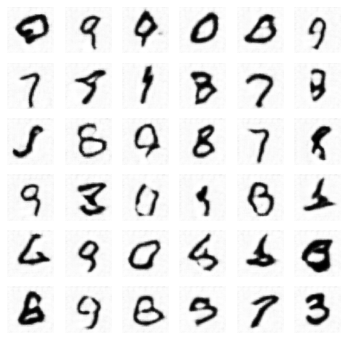

Epoch [8/10], Step [320/468], d_loss: 0.0675, g_loss: 5.0198, D(x): 0.97, D(G(z)): 0.02


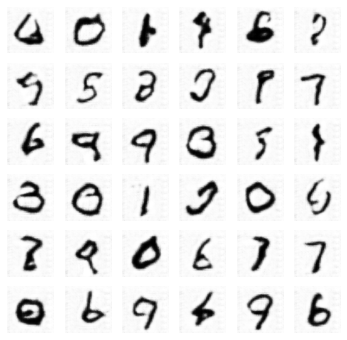

Epoch [8/10], Step [400/468], d_loss: 0.2478, g_loss: 7.2073, D(x): 1.00, D(G(z)): 0.17


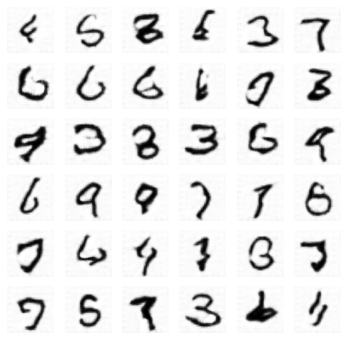

Epoch [9/10], Step [80/468], d_loss: 0.0290, g_loss: 6.7308, D(x): 0.98, D(G(z)): 0.01


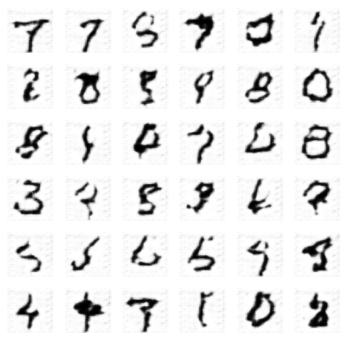

Epoch [9/10], Step [160/468], d_loss: 0.0716, g_loss: 5.2816, D(x): 0.97, D(G(z)): 0.03


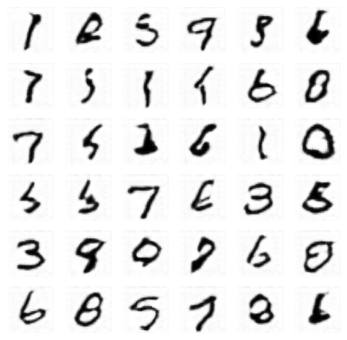

Epoch [9/10], Step [240/468], d_loss: 0.0520, g_loss: 3.5832, D(x): 0.98, D(G(z)): 0.03


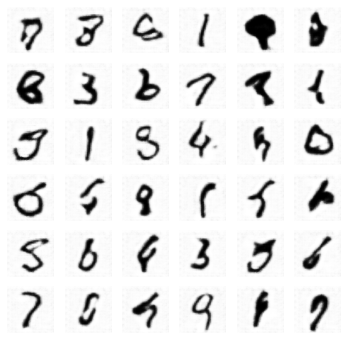

Epoch [9/10], Step [320/468], d_loss: 0.3309, g_loss: 7.3084, D(x): 0.99, D(G(z)): 0.23


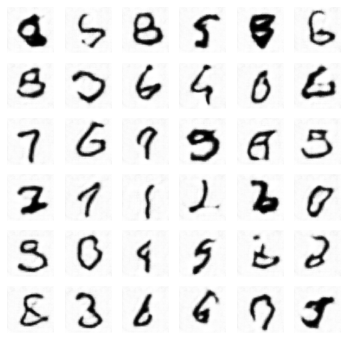

Epoch [9/10], Step [400/468], d_loss: 0.1233, g_loss: 4.2717, D(x): 0.98, D(G(z)): 0.09


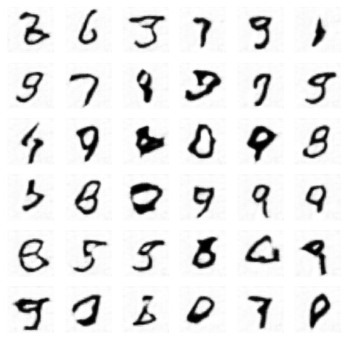

In [4]:
import sys
import os
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.optim import Adam
from torchvision.datasets import MNIST
from array2gif import write_gif

LATENT_SIZE = 100
EPOCH_SIZE  = 10
ROW_NUM     = 6
try:
  data_path = os.path.join(os.path.abspath(os.environ["CONDA_PREFIX"]),
                          'datasets')
except KeyError:
    data_path = os.path.join(os.path.abspath(os.environ["HOME"]),
                         'datasets')
# We make sure that the dataset is actually available
try:
    torchvision.datasets.MNIST(root=data_path,
                               download=False)
except RuntimeError or KeyError:
    if not os.path.isdir(data_path):
            os.makedirs(data_path)
    torchvision.datasets.MNIST(root=data_path,
                               download=True)

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


dataset = torchvision.datasets.MNIST(root=data_path,download=True)
dataset.transform = transforms.Compose([transforms.ToTensor(), 
                                        transforms.Normalize(mean = (0.5,), 
                                                             std = (0.5,)),
                                        transforms.Resize(64)])


# Data Loader
batch_size = 128
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=batch_size,
                                          shuffle=True, drop_last=True)
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device is: " + str(device))

criterion = nn.BCELoss()

discriminator = Discriminator().to(device).apply(weights_init)
generator     = Generator().to(device).apply(weights_init)

optim_d = Adam(discriminator.parameters(), lr = 0.00005)
optim_g = Adam(generator.parameters(),     lr = 0.00005)

gif_array = []*EPOCH_SIZE
total_step = len(data_loader)
for epoch in range(EPOCH_SIZE):
    for step, (imgs, _) in enumerate(data_loader):

        # Create Fake and Real Labels
        real_labels = torch.ones(batch_size, 1,1,1).to(device)
        fake_labels = torch.zeros(batch_size, 1,1,1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #
        outputs     = discriminator(imgs)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # BCE on fake images
        lat_space   = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
        fake_images = generator(lat_space)
        outputs     = discriminator(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score  = outputs

        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        optim_d.zero_grad()
        optim_g.zero_grad()
        d_loss.backward()
        optim_d.step()

        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        lat_space = torch.randn(batch_size, LATENT_SIZE, 1, 1).to(device)
        fake_images = generator(lat_space)
        outputs = discriminator(fake_images)

        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        g_loss = criterion(outputs, real_labels)

        # Backprop and optimize
        optim_d.zero_grad()
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()
        
        if (step+1) % 80 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                    .format(epoch, EPOCH_SIZE, 
                            step+1, total_step, 
                            d_loss.item(), 
                            g_loss.item(), 
                            real_score.mean().item(), 
                            fake_score.mean().item()))
            plot_epoch(fake_images.cpu())
            array_2_make_grid = ((fake_images.cpu()[0:ROW_NUM**2, :, :, :] + 1) * (1/2) * 255).type(torch.uint8)
    gif_array.append(torchvision.utils.make_grid(array_2_make_grid, nrow = ROW_NUM).numpy())
    write_gif(gif_array, filename = 'dcgan_10_fps.gif', fps = 10)

In [5]:
write_gif(gif_array, filename = 'dcgan_5_fps.gif', fps = 5)